PHẦN 1: DATA CLEANSING & FEATURE ENGINEERING

1. Viết hàm load_data() để tải dữ liệu lên ứng dụng. Sau đó, hiển thị ra màn hình 10 dòng
đầu tiên.

In [76]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn.objects as so

In [77]:
df=pd.read_csv("titanic_disaster.csv")
print(df.head(10))

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   
5            6         0       3   
6            7         0       1   
7            8         0       3   
8            9         1       3   
9           10         1       2   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   
5                                   Moran, Mr. James    male   NaN      0   
6                            McCarthy, Mr. Timothy J    male  54

2. Thống kê dữ liệu thiếu trên các biến số và trực quan hóa dữ liệu thiếu bằng biểu đồ (Heat
map). Hãy cho nhận xét về tình trạng thiếu dữ liệu Age, Cabin và Embarked

<Axes: >

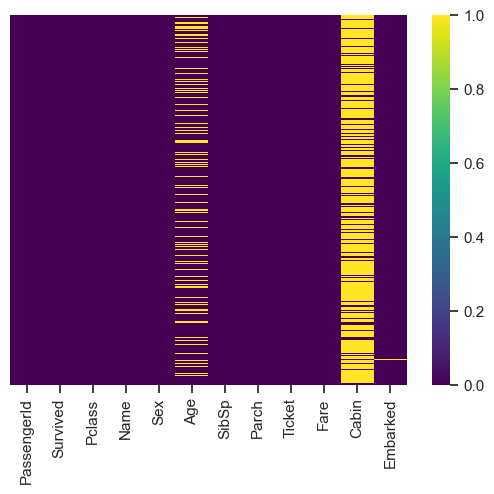

In [78]:
missing_data = df.isnull().sum()
sns.heatmap(df.isnull(), cbar=True, cmap='viridis', yticklabels=False)


### Nhận xét

Ta có thể thấy dữ liệu(Màu vàng) ở cột age và cột cabin thiếu rất nhiều nằm rải rác,Embarked thì chỉ thiếu một ít .Còn các cột khác không thiếu dữ liệu

3. Xử lý tên cột tên Name, tách ra làm 2 cột: firstName và secondName. Lưu ý: Sau khi
tách cột xong thì xóa luôn cột Name

In [79]:
df[['Firstname','Lastname']] = df['Name'].str.split("",n=1,expand=True)
df = df.drop('Name', axis=1)
print(df)


     PassengerId  Survived  Pclass     Sex   Age  SibSp  Parch  \
0              1         0       3    male  22.0      1      0   
1              2         1       1  female  38.0      1      0   
2              3         1       3  female  26.0      0      0   
3              4         1       1  female  35.0      1      0   
4              5         0       3    male  35.0      0      0   
..           ...       ...     ...     ...   ...    ...    ...   
886          887         0       2    male  27.0      0      0   
887          888         1       1  female  19.0      0      0   
888          889         0       3  female   NaN      1      2   
889          890         1       1    male  26.0      0      0   
890          891         0       3    male  32.0      0      0   

               Ticket     Fare Cabin Embarked Firstname  \
0           A/5 21171   7.2500   NaN        S             
1            PC 17599  71.2833   C85        C             
2    STON/O2. 3101282   7.9250

4. Xứ lý rút gọn kích thước dữ liệu trên cột Sex như sau: thay thế male → M và female → F

In [80]:
df['Sex'] = df['Sex'].replace({'male': 'M', 'female': 'F'})
print(df['Sex'])

0      M
1      F
2      F
3      F
4      M
      ..
886    M
887    F
888    F
889    M
890    M
Name: Sex, Length: 891, dtype: object


5. Xử lý dữ liệu thiếu trên biến Age bằng cách thay thế bằng giá trị trung bình tuổi: Hãy đưa ra quyết định dùng giá trị trung bình tuổi toàn bộ hành khách hay theo từng nhóm hạng vé (hạng hành khách: Pclass). Ta tiến hành làm các bước sau

a. Sử dụng Seaborn để vẽ biểu đồ (Box plot) trực quan dữ liệu để xác định phân
phối tuổi trên từng hạng hành khách. Nhận xét về tuổi trung bình giữa các nhóm
hành khách. Từ đó đưa ra quyết định cách thay thế giá trị tuổi bị thiếu. 

b. Tiến hành thay thế giá trị Age bị thiếu. Sau đó, hiển thị kết quả dạng bảng và trực
quan dữ liệu đã xử lý thiếu cho cột’Age’ bằng biểu đồ Heat map.

### Câu A

<Axes: title={'center': 'Hạng vé'}, xlabel='Pclass', ylabel='Age'>

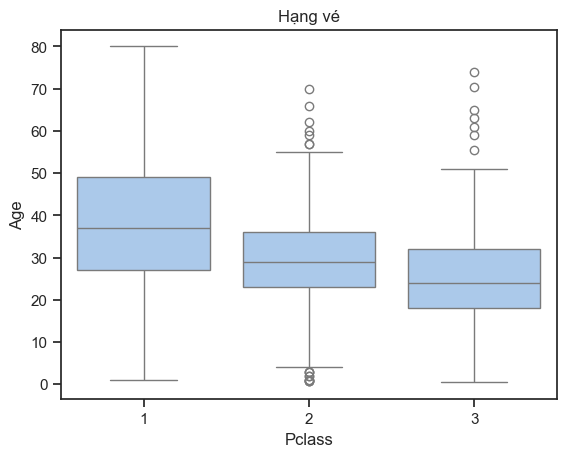

In [81]:
plt.title("Hạng vé")
sns.boxplot(x='Pclass', y='Age', data=df)

### Nhận xét
Ta thấy khoảng cách trung bình giữa các hạng là 10 tuổi,một khoảng cách tương tối lớn giữa các hạng hành khách

### Câu B


Pclass
1    38.233441
2    29.877630
3    25.140620
Name: Age, dtype: float64


<Axes: >

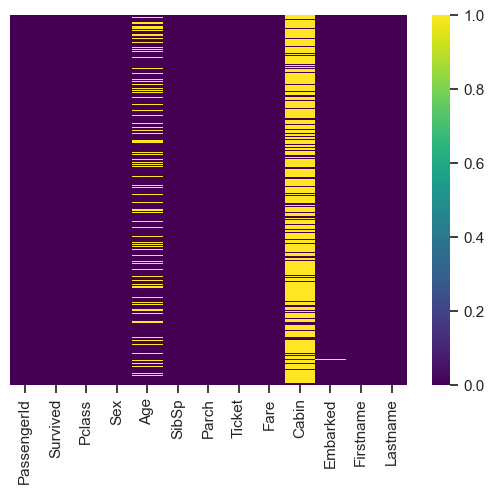

In [82]:
age_by_class = df.groupby('Pclass')['Age'].mean()
print(age_by_class)
sns.heatmap(df.isnull(), cbar=True, cmap='viridis', yticklabels=False)

6. Xây dựng biến số Agegroup có thang đo thứ tự được ánh xạ theo thang đo khoảng dựa
trên độ tuổi của hành khách như sau: (age =< 12] → Kid; (12, 18]: Teen, (18, 60]: Adult
và ( age > 60): Older

In [83]:
df['Agegroup'] = pd.cut(df['Age'],bins=[0, 12, 18, 60, float('inf')], labels=['Kid', 'Teen', 'Adult', 'Older'],right=True)
print(df[['Age', 'Agegroup']].head(20))

     Age Agegroup
0   22.0    Adult
1   38.0    Adult
2   26.0    Adult
3   35.0    Adult
4   35.0    Adult
5    NaN      NaN
6   54.0    Adult
7    2.0      Kid
8   27.0    Adult
9   14.0     Teen
10   4.0      Kid
11  58.0    Adult
12  20.0    Adult
13  39.0    Adult
14  14.0     Teen
15  55.0    Adult
16   2.0      Kid
17   NaN      NaN
18  31.0    Adult
19   NaN      NaN


7. Tiến hành thêm đặc trưng về danh xưng (namePrefix) trong xã hội bằng cách tách Mr,
Mrs, Miss, Master ra khỏi “secondName”

In [84]:
df['namePrefix'] = df['Lastname'].str.extract(r' ([A-Za-z]+)\.')
print(df[['Lastname', 'namePrefix']].head(10))

                                            Lastname namePrefix
0                            Braund, Mr. Owen Harris         Mr
1  Cumings, Mrs. John Bradley (Florence Briggs Th...        Mrs
2                             Heikkinen, Miss. Laina       Miss
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)        Mrs
4                           Allen, Mr. William Henry         Mr
5                                   Moran, Mr. James         Mr
6                            McCarthy, Mr. Timothy J         Mr
7                     Palsson, Master. Gosta Leonard     Master
8  Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)        Mrs
9                Nasser, Mrs. Nicholas (Adele Achem)        Mrs


8. Khai thác thêm thông tin số lượng thành viên đi theo nhóm thân quen (familySize) đối
với mỗi hành khách trên chuyến hải trình; family size = 1+ SibSp + Parch

In [85]:
df['familySize'] = 1 + df['SibSp'] + df['Parch']
print(df['familySize'].head(10))

0    2
1    2
2    1
3    2
4    1
5    1
6    1
7    5
8    3
9    2
Name: familySize, dtype: int64


9. Tạo thêm đặc trưng ‘Alone’ để xác định hành khách đi theo nhóm hay cá nhân bằng cách
dựa trên familySize như sau: Nếu familySize = 0 thì giá trị Alone = 1 và ngược lại là 0.

In [86]:
df["Alone"]=(df["familySize"]==1).astype(int)
print(df[["familySize","Alone"]])

     familySize  Alone
0             2      0
1             2      0
2             1      1
3             2      0
4             1      1
..          ...    ...
886           1      1
887           1      1
888           4      0
889           1      1
890           1      1

[891 rows x 2 columns]
